In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
coordinates = zip(lats, lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


-65.45016060091065 34.10246441111906
-63.9276214083617 -139.52172132315042
-15.001965664116085 -108.19624949676515
-18.438111735100193 150.67405146104045
-24.406617794526838 154.7715412615251
-56.95555454764523 -52.21628973612329
-29.491277929543756 101.09219647990454
16.539365778207724 -71.66383893980333
86.23283656571556 -33.56904486225184
-37.190441625959075 157.93136649899049
27.793376739146908 -115.76912947066965
70.02123976597963 116.47853304396551
85.79259753552924 90.13159353675582
70.537757245369 115.30431543192702
-50.088280871880336 -161.16283335162956
3.517493912303152 -90.69498422301184
63.862950083461186 -47.94800653646746
-74.49506482266295 64.17556769018998
20.958153503876616 28.046532288082744
-64.83084471884064 13.557254121628631
44.54055219969598 -148.8917161741458
-76.50289554140309 32.963981966341436
-11.506075126520969 165.45966606265364
35.550630180059954 -128.44380988305778
-76.4265753841994 -130.64373395352573
-7.71555130973988 -104.92697856276169
-25.58047118

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name 

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i].replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {cities[i]}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": cities[i].title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

ocessing Record 3 of Set 4 | grindavik
Processing Record 4 of Set 4 | airai
Processing Record 5 of Set 4 | husavik
Processing Record 6 of Set 4 | beloha
Processing Record 7 of Set 4 | norman wells
Processing Record 8 of Set 4 | ulladulla
Processing Record 9 of Set 4 | damietta
Processing Record 10 of Set 4 | salvador
Processing Record 11 of Set 4 | chaoyang
Processing Record 12 of Set 4 | ostrovnoy
Processing Record 13 of Set 4 | sao sebastiao
Processing Record 14 of Set 4 | male
Processing Record 15 of Set 4 | constitucion
Processing Record 16 of Set 4 | olafsvik
Processing Record 17 of Set 4 | tolu
Processing Record 18 of Set 4 | mahanoro
Processing Record 19 of Set 4 | never
Processing Record 20 of Set 4 | sari
Processing Record 21 of Set 4 | srednekolymsk
Processing Record 22 of Set 4 | saint-philippe
Processing Record 23 of Set 4 | paamiut
Processing Record 24 of Set 4 | nan
Processing Record 25 of Set 4 | karamea
City not found. Skipping...
Processing Record 26 of Set 4 | tsihomb

In [25]:
len(city_data)

572

In [37]:
print(city_data[2])
print(type(city_data[2]))

{'City': 'Manuk Mangkaw', 'Lat': 4.8, 'Lng': 119.85, 'Max Temp': 83.34, 'Humidity': 71, 'Cloudiness': 100, 'Wind Speed': 3.56, 'Country': 'PH', 'Date': '2021-04-10 18:02:23'}
<class 'dict'>


In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
562,Ukiah,39.1502,-123.2078,57.20,47,1,4.61,US,2021-04-10 18:04:26
563,Dehloran,32.6941,47.2679,78.51,27,33,14.56,IR,2021-04-10 18:04:26
564,Martapura,-3.4167,114.8500,77.00,94,90,1.14,ID,2021-04-10 18:04:26
565,Kushima,31.4583,131.2333,50.14,75,18,6.80,JP,2021-04-10 18:04:27
566,Leningradskiy,69.3833,178.4167,-16.60,99,100,2.26,RU,2021-04-10 18:01:56
567,Presidente Epitacio,-21.7633,-52.1156,94.68,18,0,6.06,BR,2021-04-10 18:03:08
568,Zabreh,49.8826,16.8722,46.99,76,100,3.65,CZ,2021-04-10 18:04:27
569,Pitimbu,-7.4706,-34.8086,78.80,100,75,10.36,BR,2021-04-10 18:04:27
570,Brigantine,39.4101,-74.3646,68.00,77,1,10.36,US,2021-04-10 18:04:27
571,Matay,28.4190,30.7792,60.03,28,0,18.05,EG,2021-04-10 18:04:28


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhangjiakou,CN,2021-04-10 17:59:07,40.8100,114.8794,53.10,50,99,5.64
1,Riyadh,SA,2021-04-10 17:58:25,24.6877,46.7219,95.00,9,40,6.91
2,Manuk Mangkaw,PH,2021-04-10 18:02:23,4.8000,119.8500,83.34,71,100,3.56
3,Dawlatabad,AF,2021-04-10 18:02:23,36.4141,64.9053,68.59,29,82,4.99
4,Boa Vista,BR,2021-04-10 18:02:23,2.8197,-60.6733,89.60,51,40,5.75
...,...,...,...,...,...,...,...,...,...
567,Presidente Epitacio,BR,2021-04-10 18:03:08,-21.7633,-52.1156,94.68,18,0,6.06
568,Zabreh,CZ,2021-04-10 18:04:27,49.8826,16.8722,46.99,76,100,3.65
569,Pitimbu,BR,2021-04-10 18:04:27,-7.4706,-34.8086,78.80,100,75,10.36
570,Brigantine,US,2021-04-10 18:04:27,39.4101,-74.3646,68.00,77,1,10.36


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

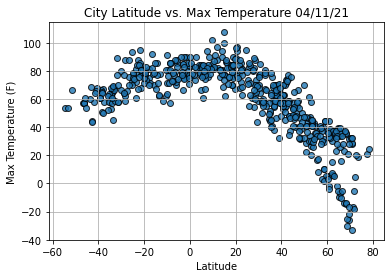

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

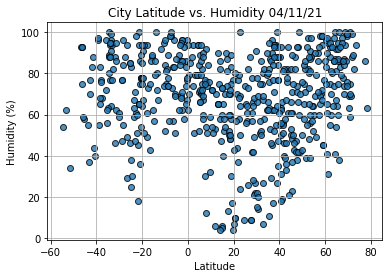

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

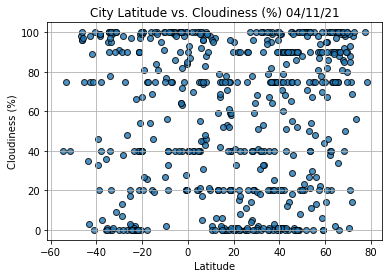

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

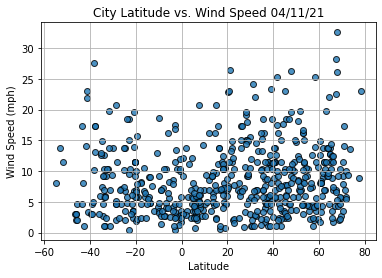

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()